Set-Up Cells:

In [3]:
!unzip -l ZacksFundamentalsB_export.zip | head -n 40

Archive:  ZacksFundamentalsB_export.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
187671896  2026-01-26 23:14   FC_20240123.zip
 38669000  2026-01-26 23:14   FR_20240123.zip
  1165672  2026-01-26 23:14   HDM_20240123.zip
  7050739  2026-01-26 23:14   MKTV_20240123.zip
  1013719  2026-01-26 23:14   MT_20240123.zip
1587281182  2026-01-26 23:14   PRICES_20241105.zip
  5346813  2026-01-26 23:14   SHRS_20240123.zip
   327887  2026-01-26 23:14   TICKERS_20240123.zip
---------                     -------
1828526908                     8 files


In [4]:
import os
os.listdir()

['.config', 'ZacksFundamentalsB_export.zip', 'sample_data']

In [5]:
!unzip ZacksFundamentalsB_export.zip HDM_20240123.zip

Archive:  ZacksFundamentalsB_export.zip
  inflating: HDM_20240123.zip        


In [12]:
!unzip -l HDM_20240123.zip | head -50

Archive:  HDM_20240123.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  3616867  2024-01-23 19:58   ZACKS_HDM_2_5035a21ce4e45c8e7fbda0facdcfcb6c.csv
---------                     -------
  3616867                     1 file


In [6]:
!ls -lh HDM_20240123.zip


-rw-r--r-- 1 root root 1.2M Jan 26 23:14 HDM_20240123.zip


In [13]:
!mkdir -p zacks_data/HDM
!unzip HDM_20240123.zip -d zacks_data/HDM


Archive:  HDM_20240123.zip
  inflating: zacks_data/HDM/ZACKS_HDM_2_5035a21ce4e45c8e7fbda0facdcfcb6c.csv  


In [14]:
!ls zacks_data/HDM | head

ZACKS_HDM_2_5035a21ce4e45c8e7fbda0facdcfcb6c.csv


In [15]:
import pandas as pd
import os

hdm_path = "zacks_data/HDM"
files = sorted([f for f in os.listdir(hdm_path) if f.endswith(".csv")])

files

['ZACKS_HDM_2_5035a21ce4e45c8e7fbda0facdcfcb6c.csv']

In [16]:
hdm = pd.concat(
    [pd.read_csv(os.path.join(hdm_path, f)) for f in files],
    ignore_index=True
)

In [17]:
hdm.head()
hdm.columns
hdm.shape
list(hdm.columns)

['action_type',
 'm_ticker',
 'status',
 'per_end_month_nbr',
 'comp_name',
 'ticker',
 'change_txt',
 'ex_date',
 'proc_date']

In [18]:
hdm['ex_date'] = pd.to_datetime(hdm['ex_date'], errors='coerce')
hdm['proc_date'] = pd.to_datetime(hdm['proc_date'], errors='coerce')

hdm = hdm.sort_values(['m_ticker', 'ex_date'])

In [19]:
!unzip ZacksFundamentalsB_export.zip PRICES_20241105.zip

Archive:  ZacksFundamentalsB_export.zip
  inflating: PRICES_20241105.zip     y



In [21]:
!ls -lh PRICES_20241105.zip


-rw-r--r-- 1 root root 1.5G Jan 26 23:14 PRICES_20241105.zip


In [22]:
!unzip -l PRICES_20241105.zip | head -n 40

Archive:  PRICES_20241105.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
5797596055  2024-11-05 23:19   QUOTEMEDIA_PRICES_247f636d651d8ef83d8ca1e756cf5ee4.csv
---------                     -------
5797596055                     1 file


In [33]:
!unzip PRICES_20241105.zip -d zacks_data/PRICES


Archive:  PRICES_20241105.zip
replace zacks_data/PRICES/QUOTEMEDIA_PRICES_247f636d651d8ef83d8ca1e756cf5ee4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: zacks_data/PRICES/QUOTEMEDIA_PRICES_247f636d651d8ef83d8ca1e756cf5ee4.csv  


In [34]:
import pandas as pd
import os

price_path = "zacks_data/PRICES"
file = os.path.join(price_path, "QUOTEMEDIA_PRICES_247f636d651d8ef83d8ca1e756cf5ee4.csv")

cols = ['ticker', 'date', 'adj_close']
prices = pd.read_csv(file, usecols=cols, parse_dates=['date'])

prices = prices[(prices['date'] >= '2018-01-01') & (prices['date'] <= '2023-06-30')]

print(prices.shape)
print(prices.head())


(14429546, 3)
  ticker       date  adj_close
0  JTKWY 2022-03-11       6.72
1  JTKWY 2022-03-10       6.07
2   FG_1 2020-06-01       8.39
3   FLWS 2022-03-09      14.45
4  RENW_ 2020-01-29      21.99


In [35]:
prices['date'] = pd.to_datetime(prices['date'])

prices = prices.merge(
    hdm[['ticker', 'm_ticker']],
    on='ticker',
    how='left'
)

missing_frac = prices['m_ticker'].isna().mean()
print(f"Fraction of prices with missing m_ticker: {missing_frac:.4f}")


Fraction of prices with missing m_ticker: 0.1813


In [36]:
all_days = prices['date'].nunique()
print(f"Total trading days: {all_days}")

coverage = prices.groupby('m_ticker')['date'].nunique()

full_coverage_ids = coverage[coverage == all_days].index

print(f"Number of firms with full coverage: {len(full_coverage_ids)}")


Total trading days: 1383
Number of firms with full coverage: 4734


In [37]:
prices.columns

Index(['ticker', 'date', 'adj_close', 'm_ticker'], dtype='object')

In [38]:
!unzip ZacksFundamentalsB_export.zip "MKTV_20240123.zip" -d zacks_data/MKTV


Archive:  ZacksFundamentalsB_export.zip
  inflating: zacks_data/MKTV/MKTV_20240123.zip  


In [39]:
!unzip zacks_data/MKTV/MKTV_20240123.zip -d zacks_data/MKTV


Archive:  zacks_data/MKTV/MKTV_20240123.zip
  inflating: zacks_data/MKTV/ZACKS_MKTV_2_ecb7f768974bbdd26964caefe2fd0378.csv  


In [40]:
!ls zacks_data/MKTV


MKTV_20240123.zip  ZACKS_MKTV_2_ecb7f768974bbdd26964caefe2fd0378.csv


In [41]:
import pandas as pd
import os

mktv_file = "zacks_data/MKTV/ZACKS_MKTV_2_ecb7f768974bbdd26964caefe2fd0378.csv"

mktv_preview = pd.read_csv(mktv_file, nrows=5)
print(mktv_preview.head())
print(mktv_preview.columns)



  ticker    m_ticker     comp_name  fye per_type per_end_date  \
0      A  A2          AGILENT TECH   10        Q   2023-09-30   
1      A  A2          AGILENT TECH   10        Q   2023-06-30   
2      A  A2          AGILENT TECH   10        Q   2023-03-31   
3      A  A2          AGILENT TECH   10        Q   2022-12-31   
4      A  A2          AGILENT TECH   10        Q   2022-09-30   

  active_ticker_flag   mkt_val    ep_val  
0                  Y  32717.11  34122.11  
1                  Y  35518.94  37076.94  
2                  Y  40907.39  42390.39  
3                  Y  44275.46  45955.46  
4                  Y  35983.73  37638.73  
Index(['ticker', 'm_ticker', 'comp_name', 'fye', 'per_type', 'per_end_date',
       'active_ticker_flag', 'mkt_val', 'ep_val'],
      dtype='object')


In [42]:
import pandas as pd
import os

mktv_file = "zacks_data/MKTV/ZACKS_MKTV_2_ecb7f768974bbdd26964caefe2fd0378.csv"

cols = ['m_ticker', 'per_end_date', 'mkt_val', 'active_ticker_flag']
mktv = pd.read_csv(mktv_file, usecols=cols, parse_dates=['per_end_date'])

mktv.rename(columns={'per_end_date': 'date', 'mkt_val': 'mktval'}, inplace=True)

mktv['m_ticker_clean'] = mktv['m_ticker'].str.strip().str.upper()

mktv_active = mktv[mktv['active_ticker_flag'] == 'Y']


In [43]:
prices['m_ticker_clean'] = prices['m_ticker'].str.strip().str.upper()

overlap_clean = set(prices['m_ticker_clean']).intersection(set(mktv_active['m_ticker_clean']))
print(f"Overlap after cleaning: {len(overlap_clean)}")


Overlap after cleaning: 4983


In [44]:
mktv_filtered = mktv_active[mktv_active['m_ticker_clean'].isin(overlap_clean)]

min_mktv = mktv_filtered.groupby('m_ticker_clean')['mktval'].min()

mktv_filter_ids = min_mktv[min_mktv >= 100].index

print(f"Firms passing $100MM filter: {len(mktv_filter_ids)}")


Firms passing $100MM filter: 2413


In [45]:
final_universe_ids = set(prices['m_ticker_clean']).intersection(mktv_filter_ids)

print(f"Final universe of firms: {len(final_universe_ids)}")


Final universe of firms: 2413


In [46]:
!unzip ZacksFundamentalsB_export.zip "FC_20240123.zip" -d zacks_data/FC


Archive:  ZacksFundamentalsB_export.zip
  inflating: zacks_data/FC/FC_20240123.zip  


In [47]:
!unzip zacks_data/FC/FC_20240123.zip -d zacks_data/FC


Archive:  zacks_data/FC/FC_20240123.zip
  inflating: zacks_data/FC/ZACKS_FC_2_76e4bece47ce87cb8f221f639c7f829b.csv  


In [48]:
!ls zacks_data/FC


FC_20240123.zip  ZACKS_FC_2_76e4bece47ce87cb8f221f639c7f829b.csv


In [49]:
fc_file = "zacks_data/FC/ZACKS_FC_2_76e4bece47ce87cb8f221f639c7f829b.csv"

fc = pd.read_csv(fc_file, parse_dates=['per_end_date'])
fc.rename(columns={'per_end_date':'date'}, inplace=True)
fc['m_ticker_clean'] = fc['m_ticker'].str.strip().str.upper()

print(fc.shape)
print(fc.head())


/tmp/ipython-input-1071819725.py:3: DtypeWarning: Columns (4,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59) have mixed types. Specify dtype option on import or set low_memory=False.
  fc = pd.read_csv(fc_file, parse_dates=['per_end_date'])


(649883, 250)
  m_ticker ticker comp_name    comp_name_2 exchange currency_code       date  \
0      CPG  3262Q       NaN  CMS ENERGY -G      NaN           USD 2006-12-31   
1      CPG  3262Q       NaN  CMS ENERGY -G      NaN           USD 2007-12-31   
2      CPG  3262Q       NaN  CMS ENERGY -G      NaN           USD 2008-12-31   
3      CPG  3262Q       NaN  CMS ENERGY -G      NaN           USD 2009-12-31   
4      CPG  3262Q       NaN  CMS ENERGY -G      NaN           USD 2010-12-31   

  per_type  per_code  per_fisc_year  ...  cash_flow_oper_activity_qd  \
0        A       NaN           2006  ...                         NaN   
1        A       NaN           2007  ...                         NaN   
2        A       NaN           2008  ...                         NaN   
3        A       NaN           2009  ...                         NaN   
4        A       NaN           2010  ...                         NaN   

   net_change_prop_plant_equip_qd  comm_stock_div_paid_qd  \
0          

In [50]:
fc['total_debt'] = fc['net_curr_debt'].fillna(0) + fc['net_lterm_debt'].fillna(0)

fc = fc[['m_ticker_clean','date','total_debt']]

print(fc.shape)
print(fc.head())


(649883, 3)
  m_ticker_clean       date  total_debt
0            CPG 2006-12-31         2.0
1            CPG 2007-12-31         0.0
2            CPG 2008-12-31         0.0
3            CPG 2009-12-31        79.0
4            CPG 2010-12-31       109.0


In [51]:
mktv_filtered = mktv_active[
    (mktv_active['m_ticker_clean'].isin(final_universe_ids)) &
    (mktv_active['date'] >= '2018-01-01') &
    (mktv_active['date'] <= '2023-06-30')
][['m_ticker_clean','date','mktval']]

funds = fc.merge(
    mktv_filtered,
    on=['m_ticker_clean','date'],
    how='left'
)

funds['debt_to_mktcap'] = funds['total_debt'] / funds['mktval']

funds['debt_to_mktcap'] = funds['debt_to_mktcap'].fillna(0)

print(funds.shape)
print(funds.head())


(649883, 5)
  m_ticker_clean       date  total_debt  mktval  debt_to_mktcap
0            CPG 2006-12-31         2.0     NaN             0.0
1            CPG 2007-12-31         0.0     NaN             0.0
2            CPG 2008-12-31         0.0     NaN             0.0
3            CPG 2009-12-31        79.0     NaN             0.0
4            CPG 2010-12-31       109.0     NaN             0.0


In [52]:
debt_filter_ids = funds.groupby('m_ticker_clean')['debt_to_mktcap'].max()

debt_filter_ids = debt_filter_ids[debt_filter_ids > 0.1].index

print(f"Firms passing debt/market cap > 0.1 somewhere: {len(debt_filter_ids)}")


Firms passing debt/market cap > 0.1 somewhere: 1097


In [53]:
!unzip ZacksFundamentalsB_export.zip "FR_20240123.zip" -d zacks_data/FR
!unzip zacks_data/FR/FR_20240123.zip -d zacks_data/FR


Archive:  ZacksFundamentalsB_export.zip
  inflating: zacks_data/FR/FR_20240123.zip  
Archive:  zacks_data/FR/FR_20240123.zip
  inflating: zacks_data/FR/ZACKS_FR_2_f40c6a304f87d9f492c1f21839d474e2.csv  


In [54]:
!ls zacks_data/FR

FR_20240123.zip  ZACKS_FR_2_f40c6a304f87d9f492c1f21839d474e2.csv


In [55]:
import pandas as pd

fr_file = "zacks_data/FR/ZACKS_FR_2_f40c6a304f87d9f492c1f21839d474e2.csv"

fr = pd.read_csv(fr_file, parse_dates=['per_end_date'])

fr.rename(columns={'per_end_date':'date', 'm_ticker':'m_ticker_clean'}, inplace=True)
fr['m_ticker_clean'] = fr['m_ticker_clean'].str.strip().str.upper()

print(f"FR shape: {fr.shape}")
print(fr.head())


/tmp/ipython-input-2396880804.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  fr = pd.read_csv(fr_file, parse_dates=['per_end_date'])


FR shape: (649883, 40)
  m_ticker_clean ticker comp_name    comp_name_2 exchange currency_code  \
0            CPG  3262Q       NaN  CMS ENERGY -G      NaN           USD   
1            CPG  3262Q       NaN  CMS ENERGY -G      NaN           USD   
2            CPG  3262Q       NaN  CMS ENERGY -G      NaN           USD   
3            CPG  3262Q       NaN  CMS ENERGY -G      NaN           USD   
4            CPG  3262Q       NaN  CMS ENERGY -G      NaN           USD   

        date per_type  per_code  per_fisc_year  ...  invty_turn  rcv_turn  \
0 2006-12-31        A       NaN           2006  ...         NaN       NaN   
1 2007-12-31        A       NaN           2007  ...         NaN       NaN   
2 2008-12-31        A       NaN           2008  ...         NaN       NaN   
3 2009-12-31        A       NaN           2009  ...         NaN       NaN   
4 2010-12-31        A       NaN           2010  ...         NaN       NaN   

   day_sale_rcv  ret_equity  ret_tang_equity  ret_asset  ret_in

In [56]:
import os

folders = ['zacks_data/TICKERS', 'zacks_data/MKTV', 'zacks_data/HDM', 'zacks_data/FC', 'zacks_data/FR']

for f in folders:
    if os.path.exists(f):
        print(f"\nFiles in {f}:")
        print(os.listdir(f))
    else:
        print(f"\nFolder {f} does not exist")


Folder zacks_data/TICKERS does not exist

Files in zacks_data/MKTV:
['MKTV_20240123.zip', 'ZACKS_MKTV_2_ecb7f768974bbdd26964caefe2fd0378.csv']

Files in zacks_data/HDM:
['ZACKS_HDM_2_5035a21ce4e45c8e7fbda0facdcfcb6c.csv']

Files in zacks_data/FC:
['FC_20240123.zip', 'ZACKS_FC_2_76e4bece47ce87cb8f221f639c7f829b.csv']

Files in zacks_data/FR:
['FR_20240123.zip', 'ZACKS_FR_2_f40c6a304f87d9f492c1f21839d474e2.csv']


In [57]:
!unzip ZacksFundamentalsB_export.zip "TICKERS_20240123.zip" -d zacks_data/TICKERS
!unzip zacks_data/TICKERS/TICKERS_20240123.zip -d zacks_data/TICKERS

Archive:  ZacksFundamentalsB_export.zip
  inflating: zacks_data/TICKERS/TICKERS_20240123.zip  
Archive:  zacks_data/TICKERS/TICKERS_20240123.zip
  inflating: zacks_data/TICKERS/QUOTEMEDIA_TICKERS_6d75499fefd916e54334b292986eafcc.csv  


In [58]:

!unzip ZacksFundamentalsB_export.zip "MT_20240123.zip" -d zacks_data/MT
!unzip zacks_data/MT/MT_20240123.zip -d zacks_data/MT

!unzip ZacksFundamentalsB_export.zip "SHRS_20240123.zip" -d zacks_data/SHRS
!unzip zacks_data/SHRS/SHRS_20240123.zip -d zacks_data/SHRS


Archive:  ZacksFundamentalsB_export.zip
  inflating: zacks_data/MT/MT_20240123.zip  
Archive:  zacks_data/MT/MT_20240123.zip
  inflating: zacks_data/MT/ZACKS_MT_2_5c2afb6368dcc3ed48e1a84279323e63.csv  
Archive:  ZacksFundamentalsB_export.zip
  inflating: zacks_data/SHRS/SHRS_20240123.zip  
Archive:  zacks_data/SHRS/SHRS_20240123.zip
  inflating: zacks_data/SHRS/ZACKS_SHRS_2_99db6fa97ac677f3c0d45a9fa9a70196.csv  


In [59]:
import pandas as pd
import os

mt_files = [f for f in os.listdir("zacks_data/MT") if f.endswith(".csv")]
print(mt_files)

mt_preview = pd.read_csv(os.path.join("zacks_data/MT", mt_files[0]), nrows=5)
print(mt_preview.head())
print(mt_preview.columns)


['ZACKS_MT_2_5c2afb6368dcc3ed48e1a84279323e63.csv']
  m_ticker ticker  comp_name      comp_name_2  exchange  currency_code  \
0     Z86Z  0425B        NaN         PCA INTL       NaN            NaN   
1     FFFC  1186Q        NaN   FRANKLIN FIRST       NaN            NaN   
2     WSTF  1197Q        NaN  WESTERN FINL CP       NaN            NaN   
3     HBCI  1209Q        NaN         HARMONIA       NaN            NaN   
4     TONE  1352Q        NaN          ONE BCP       NaN            NaN   

   ticker_type active_ticker_flag  comp_url  sic_4_code  ...  \
0          NaN                  N       NaN         NaN  ...   
1          NaN                  N       NaN         NaN  ...   
2          NaN                  N       NaN         NaN  ...   
3          NaN                  N       NaN         NaN  ...   
4          NaN                  N       NaN         NaN  ...   

   per_end_month_nbr  mr_split_date  mr_split_factor  comp_cik  country_code  \
0                  1            NaN   

In [60]:
fr_file = "zacks_data/FR/ZACKS_FR_2_f40c6a304f87d9f492c1f21839d474e2.csv"
fr = pd.read_csv(fr_file, parse_dates=['per_end_date'])
fr.rename(columns={'per_end_date':'date'}, inplace=True)
fr['m_ticker_clean'] = fr['m_ticker'].str.strip().str.upper()

debt_filter_ids = funds.groupby('m_ticker_clean')['debt_to_mktcap'].max()
debt_filter_ids = debt_filter_ids[debt_filter_ids > 0.1].index
fr_filtered = fr[fr['m_ticker_clean'].isin(debt_filter_ids)]

mt_file = "zacks_data/MT/ZACKS_MT_2_5c2afb6368dcc3ed48e1a84279323e63.csv"
mt = pd.read_csv(mt_file, usecols=['m_ticker', 'active_ticker_flag', 'zacks_x_sector_desc'])
mt['m_ticker_clean'] = mt['m_ticker'].str.strip().str.upper()
mt_active = mt[mt['active_ticker_flag'] == 'Y']

fr_filtered = fr_filtered.merge(
    mt_active[['m_ticker_clean','zacks_x_sector_desc']],
    on='m_ticker_clean',
    how='left'
)

sectors_to_exclude = ['Automotive', 'Financial', 'Insurance']
fr_filtered = fr_filtered[~fr_filtered['zacks_x_sector_desc'].isin(sectors_to_exclude)]

fr_filtered = fr_filtered[(fr_filtered['date'] >= '2018-01-01') & (fr_filtered['date'] <= '2023-06-30')]

print(f"Rows after sector and date filter: {len(fr_filtered)}")
print(f"Unique firms remaining: {fr_filtered['m_ticker_clean'].nunique()}")


/tmp/ipython-input-457753337.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  fr = pd.read_csv(fr_file, parse_dates=['per_end_date'])


Rows after sector and date filter: 27599
Unique firms remaining: 1097


In [61]:
fc_file = "zacks_data/FC/ZACKS_FC_2_76e4bece47ce87cb8f221f639c7f829b.csv"

fc_full = pd.read_csv(fc_file, low_memory=False)

fc_full.rename(columns={'m_ticker':'m_ticker_clean', 'per_end_date':'date'}, inplace=True)

fc_full['m_ticker_clean'] = fc_full['m_ticker_clean'].str.strip().str.upper()

eps_cols = [c for c in fc_full.columns if 'eps' in c.lower()]
print("EPS columns available:", eps_cols)


EPS columns available: ['eps_basic_cont_oper', 'eps_basic_discont_oper', 'eps_basic_acct_change', 'eps_basic_extra', 'eps_basic_consol', 'eps_basic_parent_comp', 'basic_net_eps', 'eps_diluted_cont_oper', 'eps_diluted_discont_oper', 'eps_diluted_acct_change', 'eps_diluted_extra', 'eps_diluted_consol', 'eps_diluted_parent_comp', 'diluted_net_eps', 'eps_basic_net', 'eps_diluted_net']


In [62]:
shrs_file = "zacks_data/SHRS/ZACKS_SHRS_2_99db6fa97ac677f3c0d45a9fa9a70196.csv"
shrs = pd.read_csv(shrs_file, parse_dates=['per_end_date'])

shrs['m_ticker_clean'] = shrs['m_ticker'].str.strip().str.upper()

shrs = shrs[['m_ticker_clean', 'per_end_date', 'shares_out']]
shrs.rename(columns={'per_end_date':'date'}, inplace=True)

print(shrs.head())


  m_ticker_clean       date  shares_out
0             A2 2023-07-31      292.59
1             A2 2023-04-30      295.38
2             A2 2023-01-31      295.70
3             A2 2022-10-31      296.04
4             A2 2022-07-31      296.04


In [63]:
fc_pe = fc_full[['m_ticker_clean', 'date', 'eps_diluted_net', 'eps_basic_net']].copy()

fc_pe['eps'] = fc_pe['eps_diluted_net'].fillna(fc_pe['eps_basic_net'])

fc_pe['eps'] = fc_pe['eps'].apply(lambda x: max(x, 0.001) if pd.notna(x) else x)

fc_pe = fc_pe[['m_ticker_clean', 'date', 'eps']]


In [64]:
tickers_keep = fr_filtered['m_ticker_clean'].unique()

prices_sorted = prices.sort_values(['m_ticker_clean','date'])
prices_sorted = prices_sorted[prices_sorted['m_ticker_clean'].isin(tickers_keep)].reset_index(drop=True)

fc_pe_sorted = fc_pe.sort_values(['m_ticker_clean','date'])
fc_pe_sorted = fc_pe_sorted[fc_pe_sorted['m_ticker_clean'].isin(tickers_keep)].reset_index(drop=True)

shrs_sorted = shrs.sort_values(['m_ticker_clean','date'])
shrs_sorted = shrs_sorted[shrs_sorted['m_ticker_clean'].isin(tickers_keep)].reset_index(drop=True)


In [65]:
from tqdm import tqdm
import pandas as pd

prices['date'] = pd.to_datetime(prices['date'])
fc_pe['date'] = pd.to_datetime(fc_pe['date'])
shrs['date'] = pd.to_datetime(shrs['date'])

tickers_keep = fr_filtered['m_ticker_clean'].unique()
all_pe_data = []

for ticker in tqdm(tickers_keep, desc="Processing tickers"):
    pr = prices[prices['m_ticker_clean'] == ticker].sort_values('date')
    eps = fc_pe[fc_pe['m_ticker_clean'] == ticker].sort_values('date')
    sh = shrs[shrs['m_ticker_clean'] == ticker].sort_values('date')

    if pr.empty:
        continue

    merged = pd.merge_asof(
        pr,
        eps,
        left_on='date',
        right_on='date',
        direction='backward',
        allow_exact_matches=True
    )

    merged = pd.merge_asof(
        merged,
        sh,
        left_on='date',
        right_on='date',
        direction='backward',
        allow_exact_matches=True
    )

    all_pe_data.append(merged)

pe_data = pd.concat(all_pe_data, ignore_index=True)
pe_data[['eps', 'shares_out']] = pe_data.groupby('m_ticker_clean')[['eps','shares_out']].ffill()



Processing tickers:   1%|          | 7/1097 [00:18<48:41,  2.68s/it]


KeyboardInterrupt: 

Had to make it much quicker haha! The code below did the trick.

In [66]:
import pandas as pd
from tqdm import tqdm

prices['date'] = pd.to_datetime(prices['date'])
fc_pe['date'] = pd.to_datetime(fc_pe['date'])
shrs['date'] = pd.to_datetime(shrs['date'])

tickers_keep = fr_filtered['m_ticker_clean'].unique()

prices = prices[prices['m_ticker_clean'].isin(tickers_keep)].sort_values(['m_ticker_clean','date']).reset_index(drop=True)
fc_pe = fc_pe[fc_pe['m_ticker_clean'].isin(tickers_keep)].sort_values(['m_ticker_clean','date']).reset_index(drop=True)
shrs = shrs[shrs['m_ticker_clean'].isin(tickers_keep)].sort_values(['m_ticker_clean','date']).reset_index(drop=True)

pe_data_list = []

for ticker in tqdm(tickers_keep, desc="Processing tickers"):
    pr = prices[prices['m_ticker_clean'] == ticker]
    eps = fc_pe[fc_pe['m_ticker_clean'] == ticker]
    sh = shrs[shrs['m_ticker_clean'] == ticker]

    tmp = pd.merge_asof(
        pr, eps,
        by='m_ticker_clean',
        left_on='date',
        right_on='date',
        direction='backward'
    )
    tmp = pd.merge_asof(
        tmp, sh,
        by='m_ticker_clean',
        left_on='date',
        right_on='date',
        direction='backward'
    )

    tmp[['eps','shares_out']] = tmp[['eps','shares_out']].ffill()
    pe_data_list.append(tmp)

pe_data = pd.concat(pe_data_list, ignore_index=True)


Processing tickers: 100%|██████████| 1097/1097 [06:00<00:00,  3.04it/s]


In [67]:
pe_filtered = pe_data[
    (pe_data['date'] >= '2018-01-01') &
    (pe_data['date'] <= '2023-06-30') &
    (pe_data['eps'].notna()) &
    (pe_data['shares_out'].notna())
]

remaining_tickers = pe_filtered['m_ticker_clean'].nunique()
remaining_rows = len(pe_filtered)

print(f"Rows satisfying all criteria: {remaining_rows}")
print(f"Unique tickers satisfying all criteria: {remaining_tickers}")


Rows satisfying all criteria: 2043241
Unique tickers satisfying all criteria: 1082


In [224]:
import numpy as np

all_tickers = pe_filtered['m_ticker_clean'].unique()
print(f"Total tickers available for selection: {len(all_tickers)}")

np.random.seed(42)
selected_tickers = np.random.choice(all_tickers, size=199, replace=False)

print(f"Number of tickers randomly selected: {len(selected_tickers)}")

pe_selected = pe_filtered[pe_filtered['m_ticker_clean'].isin(selected_tickers)]


Total tickers available for selection: 1082
Number of tickers randomly selected: 199


In [191]:
pe_selected.to_csv("pe_selected_200.csv", index=False)


In [223]:
import pandas as pd

pe_check = pd.read_csv("pe_selected_200.csv")
print(pe_check.head())
print(pe_check.info())
print(pe_check['m_ticker_clean'].nunique())

         date m_ticker_clean        roi            pe  debt_to_mktcap  ret
0  2018-04-02           AGI2   0.022019   5002.720568       -0.000616  NaN
1  2018-04-02           ARCO   0.051707   7936.512615        0.365003  NaN
2  2018-04-02           ASC2  -0.687467   6423.942781        0.019990  NaN
3  2018-04-02           ASN2 -12.968387  60060.000000        0.000000  NaN
4  2018-04-02           AZUL   3.716526     59.315789       -0.003999  NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173193 entries, 0 to 173192
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            173193 non-null  object 
 1   m_ticker_clean  173193 non-null  object 
 2   roi             172574 non-null  float64
 3   pe              172573 non-null  float64
 4   debt_to_mktcap  172573 non-null  float64
 5   ret             172993 non-null  float64
dtypes: float64(4), object(2)
memory usage: 7.9+ MB
None
199


In [ ]:
pe_df = pe_df.sort_values(['m_ticker_clean','date']).reset_index(drop=True)
fc = fc.sort_values(['m_ticker_clean','date']).reset_index(drop=True)

merged_list = []
for ticker in pe_df['m_ticker_clean'].unique():
    pe_t = pe_df[pe_df['m_ticker_clean']==ticker].copy()
    fc_t = fc[fc['m_ticker_clean']==ticker].copy()

    if len(fc_t) == 0:
        pe_t['total_debt'] = 0
    else:
        merged = pd.merge_asof(
            pe_t,
            fc_t[['date','total_debt']],
            left_on='date',
            right_on='date',
            direction='backward'
        )
        merged['total_debt'] = merged['total_debt'].ffill().fillna(0)
        pe_t = merged

    merged_list.append(pe_t)

pe_with_debt = pd.concat(merged_list, ignore_index=True)


Now we have around200 stocks and needed data by date. Let's go apply trading stratgeies and perform analysis.

In [199]:
import pandas as pd

pe_selected = pd.read_csv('pe_selected_200.csv', parse_dates=['date'])

print("Columns in CSV:")
print(pe_selected.columns)

print("\nFirst 5 rows:")
print(pe_selected.head())

print("\nUnique tickers:", pe_selected['m_ticker_clean'].nunique())


Columns in CSV:
Index(['date', 'm_ticker_clean', 'roi', 'pe', 'debt_to_mktcap', 'ret'], dtype='object')

First 5 rows:
        date m_ticker_clean        roi            pe  debt_to_mktcap  ret
0 2018-04-02           AGI2   0.022019   5002.720568       -0.000616  NaN
1 2018-04-02           ARCO   0.051707   7936.512615        0.365003  NaN
2 2018-04-02           ASC2  -0.687467   6423.942781        0.019990  NaN
3 2018-04-02           ASN2 -12.968387  60060.000000        0.000000  NaN
4 2018-04-02           AZUL   3.716526     59.315789       -0.003999  NaN

Unique tickers: 199


In [200]:
import pandas as pd

pe_selected['date'] = pd.to_datetime(pe_selected['date'])

pe_selected = pe_selected.sort_values(['m_ticker_clean', 'date']).reset_index(drop=True)

pe_selected['month'] = pe_selected['date'].dt.to_period('M')

for ratio in ['debt_to_mktcap', 'roi', 'pe']:
    pe_selected[ratio + '_rank'] = pe_selected.groupby('month')[ratio].rank(pct=True)

for ratio in ['debt_to_mktcap', 'roi', 'pe']:
    pe_selected[ratio + '_top_decile'] = pe_selected[ratio + '_rank'] >= 0.9
    pe_selected[ratio + '_bottom_decile'] = pe_selected[ratio + '_rank'] <= 0.1

print(pe_selected[['date', 'm_ticker_clean', 'debt_to_mktcap', 'debt_to_mktcap_rank',
                   'debt_to_mktcap_top_decile', 'debt_to_mktcap_bottom_decile',
                   'roi', 'roi_rank', 'roi_top_decile', 'roi_bottom_decile',
                   'pe', 'pe_rank', 'pe_top_decile', 'pe_bottom_decile']].head(20))


         date m_ticker_clean  debt_to_mktcap  debt_to_mktcap_rank  \
0  2018-05-10            AA2        0.005881             0.593429   
1  2018-05-11            AA2        0.005862             0.592842   
2  2018-05-14            AA2        0.006045             0.596656   
3  2018-05-15            AA2        0.006259             0.602229   
4  2018-05-16            AA2        0.006302             0.603403   
5  2018-05-17            AA2        0.006238             0.601936   
6  2018-05-18            AA2        0.006223             0.601643   
7  2018-05-21            AA2        0.006280             0.603109   
8  2018-05-22            AA2        0.006366             0.604869   
9  2018-05-23            AA2        0.006513             0.611030   
10 2018-05-24            AA2        0.006436             0.606043   
11 2018-05-25            AA2        0.006600             0.613963   
12 2018-05-29            AA2        0.006687             0.614550   
13 2018-05-30            AA2      

Now we can actually trade them and look at the performances.

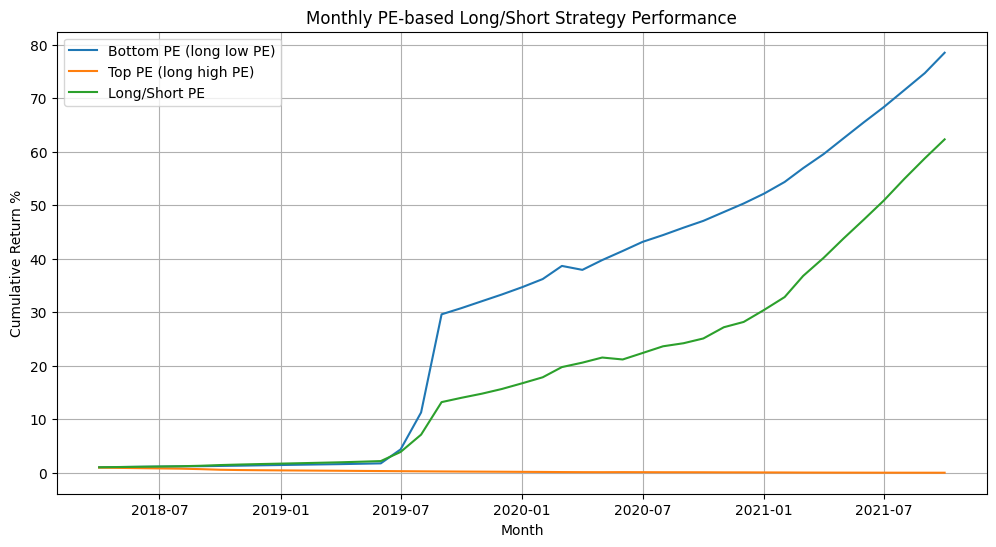

,month,bottom_pe_ret,top_pe_ret,long_short_ret,cum_bottom,cum_top,cum_long_short
0,2018-04-01,0.048221,-0.025921,0.037071,1.048221,0.974079,1.037071
1,2018-05-01,0.040341,-0.047826,0.044084,1.090507,0.927492,1.082789
2,2018-06-01,0.038182,-0.052419,0.045301,1.132146,0.878875,1.131840
3,2018-07-01,0.033974,-0.053742,0.043858,1.170609,0.831642,1.181480
4,2018-08-01,0.032641,-0.056429,0.044535,1.208818,0.784713,1.234097


In [209]:
import pandas as pd
import matplotlib.pyplot as plt

pe = pd.read_csv("pe_selected_200.csv")
pe['date'] = pd.to_datetime(pe['date'])
pe['month'] = pe['date'].dt.to_period('M')

pe['pe_rank'] = pe.groupby('month')['pe'].transform(lambda x: pd.qcut(x, 4, labels=False, duplicates='drop'))

initial_capital = 100_000
stock_price = 100

monthly_positions = []

for month, df_month in pe.groupby('month'):
    bottom = df_month[df_month['pe_rank'] == 0].copy()
    top = df_month[df_month['pe_rank'] == 3].copy()

    n_bottom = len(bottom)
    n_top = len(top)

    if n_bottom > 0:
        position_size_bottom = initial_capital / 2 / n_bottom
        bottom['position_value'] = position_size_bottom
        bottom['shares'] = bottom['position_value'] / stock_price
        bottom['pnl'] = bottom['shares'] * bottom['roi']
    else:
        bottom['pnl'] = 0

    if n_top > 0:
        position_size_top = initial_capital / 2 / n_top
        top['position_value'] = position_size_top
        top['shares'] = top['position_value'] / stock_price
        top['pnl'] = top['shares'] * top['roi']
    else:
        top['pnl'] = 0

    long_short_pnl = bottom['pnl'].sum() - top['pnl'].sum()

    monthly_positions.append({
        'month': month.to_timestamp(),
        'bottom_pe_ret': bottom['pnl'].sum() / (initial_capital/2) if n_bottom>0 else 0,
        'top_pe_ret': top['pnl'].sum() / (initial_capital/2) if n_top>0 else 0,
        'long_short_ret': long_short_pnl / initial_capital
    })

monthly_returns = pd.DataFrame(monthly_positions).sort_values('month')

# Cumulative returns
monthly_returns['cum_bottom'] = (1 + monthly_returns['bottom_pe_ret']).cumprod()
monthly_returns['cum_top'] = (1 + monthly_returns['top_pe_ret']).cumprod()
monthly_returns['cum_long_short'] = (1 + monthly_returns['long_short_ret']).cumprod()

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_returns['month'], monthly_returns['cum_bottom'], label='Bottom PE (long low PE)')
plt.plot(monthly_returns['month'], monthly_returns['cum_top'], label='Top PE (long high PE)')
plt.plot(monthly_returns['month'], monthly_returns['cum_long_short'], label='Long/Short PE')
plt.xlabel('Month')
plt.ylabel('Cumulative Return %')
plt.title('Monthly PE-based Long/Short Strategy Performance')
plt.legend()
plt.grid(True)
plt.show()

monthly_returns.head()


Apply to all 3 "factors" per the assignment now:

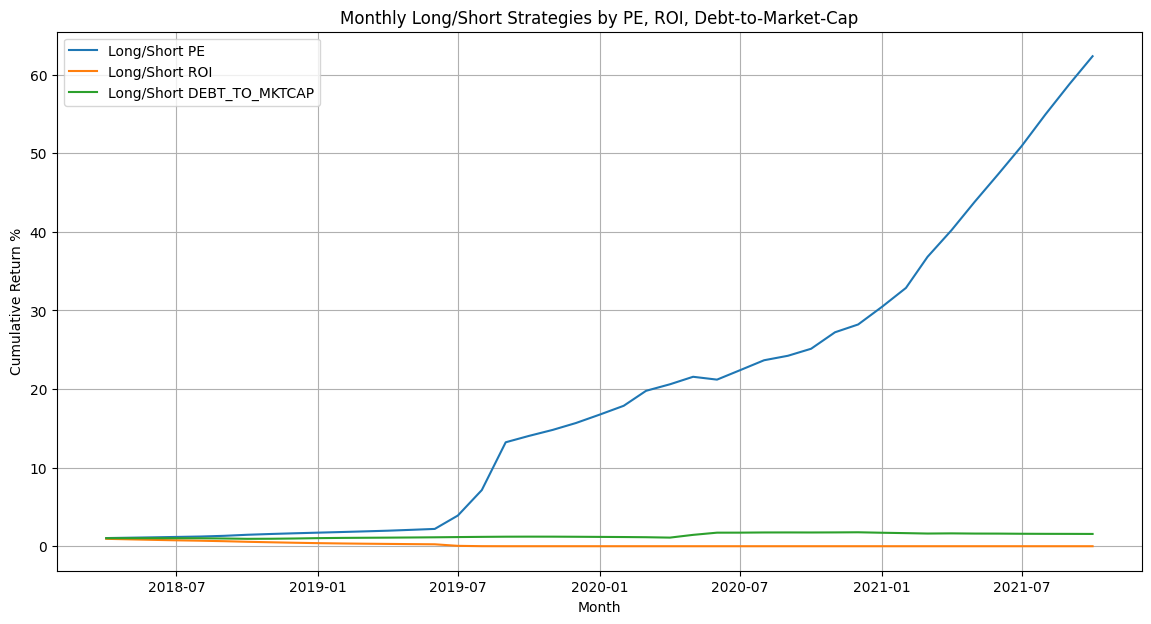


Top rows for PE strategy:


,month,pe_bottom_ret,pe_top_ret,pe_long_short_ret,cum_bottom,cum_top,cum_long_short
0,2018-04-01,0.048221,-0.025921,0.037071,1.048221,0.974079,1.037071
1,2018-05-01,0.040341,-0.047826,0.044084,1.090507,0.927492,1.082789
2,2018-06-01,0.038182,-0.052419,0.045301,1.132146,0.878875,1.131840
3,2018-07-01,0.033974,-0.053742,0.043858,1.170609,0.831642,1.181480
4,2018-08-01,0.032641,-0.056429,0.044535,1.208818,0.784713,1.234097



Top rows for ROI strategy:


,month,roi_bottom_ret,roi_top_ret,roi_long_short_ret,cum_bottom,cum_top,cum_long_short
0,2018-04-01,-0.058031,0.060550,-0.059291,0.941969,1.060550,0.940709
1,2018-05-01,-0.067052,0.074046,-0.070549,0.878808,1.139080,0.874343
2,2018-06-01,-0.069430,0.079170,-0.074300,0.817792,1.229261,0.809379
3,2018-07-01,-0.070158,0.074713,-0.072436,0.760417,1.321104,0.750751
4,2018-08-01,-0.067790,0.064366,-0.066078,0.708869,1.406137,0.701143



Top rows for DEBT_TO_MKTCAP strategy:


,month,debt_to_mktcap_bottom_ret,debt_to_mktcap_top_ret,debt_to_mktcap_long_short_ret,cum_bottom,cum_top,cum_long_short
0,2018-04-01,0.038468,0.002666,0.017901,1.038468,1.002666,1.017901
1,2018-05-01,0.021653,0.018171,0.001741,1.060955,1.020886,1.019673
2,2018-06-01,0.023239,0.019665,0.001787,1.085610,1.040962,1.021495
3,2018-07-01,0.016405,0.024565,-0.004080,1.103420,1.066533,1.017328
4,2018-08-01,0.012608,0.016083,-0.001737,1.117332,1.083687,1.015560


In [210]:
import pandas as pd
import matplotlib.pyplot as plt

pe = pd.read_csv("pe_selected_200.csv")
pe['date'] = pd.to_datetime(pe['date'])
pe['month'] = pe['date'].dt.to_period('M')

metrics = ['pe', 'roi', 'debt_to_mktcap']

monthly_results = {}

initial_capital = 100_000
stock_price = 100

for metric in metrics:
    pe[f'{metric}_rank'] = pe.groupby('month')[metric].transform(
        lambda x: pd.qcut(x, 4, labels=False, duplicates='drop')
    )

    monthly_positions = []

    for month, df_month in pe.groupby('month'):
        bottom = df_month[df_month[f'{metric}_rank'] == 0].copy()
        top = df_month[df_month[f'{metric}_rank'] == 3].copy()

        n_bottom = len(bottom)
        n_top = len(top)

        if n_bottom > 0:
            position_size_bottom = initial_capital / 2 / n_bottom
            bottom['position_value'] = position_size_bottom
            bottom['shares'] = bottom['position_value'] / stock_price
            bottom['pnl'] = bottom['shares'] * bottom['roi']
        else:
            bottom['pnl'] = 0

        if n_top > 0:
            position_size_top = initial_capital / 2 / n_top
            top['position_value'] = position_size_top
            top['shares'] = top['position_value'] / stock_price
            top['pnl'] = top['shares'] * top['roi']
        else:
            top['pnl'] = 0

        long_short_pnl = bottom['pnl'].sum() - top['pnl'].sum()

        monthly_positions.append({
            'month': month.to_timestamp(),
            f'{metric}_bottom_ret': bottom['pnl'].sum() / (initial_capital/2) if n_bottom>0 else 0,
            f'{metric}_top_ret': top['pnl'].sum() / (initial_capital/2) if n_top>0 else 0,
            f'{metric}_long_short_ret': long_short_pnl / initial_capital
        })

    monthly_results[metric] = pd.DataFrame(monthly_positions).sort_values('month')
    monthly_results[metric][f'cum_bottom'] = (1 + monthly_results[metric][f'{metric}_bottom_ret']).cumprod()
    monthly_results[metric][f'cum_top'] = (1 + monthly_results[metric][f'{metric}_top_ret']).cumprod()
    monthly_results[metric][f'cum_long_short'] = (1 + monthly_results[metric][f'{metric}_long_short_ret']).cumprod()

plt.figure(figsize=(14,7))
for metric in metrics:
    plt.plot(monthly_results[metric]['month'], monthly_results[metric]['cum_long_short'], label=f'Long/Short {metric.upper()}')
plt.xlabel('Month')
plt.ylabel('Cumulative Return %')
plt.title('Monthly Long/Short Strategies by PE, ROI, Debt-to-Market-Cap')
plt.legend()
plt.grid(True)
plt.show()

for metric in metrics:
    print(f"\nTop rows for {metric.upper()} strategy:")
    display(monthly_results[metric].head())


I'll choose the combo of the best two strats: PE and debt to market cap:

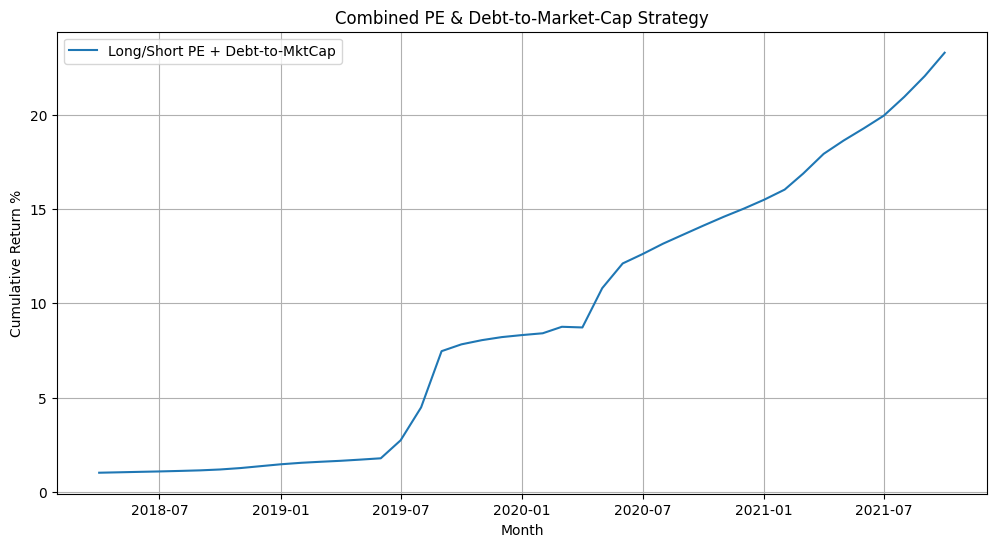

,month,bottom_ret,top_ret,long_short_ret,cum_bottom,cum_top,cum_long_short
0,2018-04-01,0.042975,-0.014255,0.028615,1.042975,0.985745,1.028615
1,2018-05-01,0.033229,-0.009692,0.021460,1.077632,0.976191,1.050690
2,2018-06-01,0.035565,-0.010245,0.022905,1.115958,0.966189,1.074756
3,2018-07-01,0.028190,-0.012324,0.020257,1.147417,0.954282,1.096527
4,2018-08-01,0.028505,-0.021388,0.024947,1.180124,0.933872,1.123882


In [211]:
import pandas as pd
import matplotlib.pyplot as plt

pe = pd.read_csv("pe_selected_200.csv")
pe['date'] = pd.to_datetime(pe['date'])
pe['month'] = pe['date'].dt.to_period('M')

metric1 = 'pe'
metric2 = 'debt_to_mktcap'

pe[f'{metric1}_rank'] = pe.groupby('month')[metric1].transform(
    lambda x: pd.qcut(x, 4, labels=False, duplicates='drop')
)
pe[f'{metric2}_rank'] = pe.groupby('month')[metric2].transform(
    lambda x: pd.qcut(x, 4, labels=False, duplicates='drop')
)

pe['combined_rank'] = (pe[f'{metric1}_rank'] + pe[f'{metric2}_rank']) / 2

initial_capital = 100_000
stock_price = 100

monthly_positions = []

for month, df_month in pe.groupby('month'):
    df_month['combined_quartile'] = pd.qcut(df_month['combined_rank'], 4, labels=False, duplicates='drop')

    bottom = df_month[df_month['combined_quartile'] == 0].copy()
    top = df_month[df_month['combined_quartile'] == 3].copy()

    n_bottom = len(bottom)
    n_top = len(top)

    if n_bottom > 0:
        position_size_bottom = initial_capital / 2 / n_bottom
        bottom['position_value'] = position_size_bottom
        bottom['shares'] = bottom['position_value'] / stock_price
        bottom['pnl'] = bottom['shares'] * bottom['roi']
    else:
        bottom['pnl'] = 0

    if n_top > 0:
        position_size_top = initial_capital / 2 / n_top
        top['position_value'] = position_size_top
        top['shares'] = top['position_value'] / stock_price
        top['pnl'] = top['shares'] * top['roi']
    else:
        top['pnl'] = 0

    long_short_pnl = bottom['pnl'].sum() - top['pnl'].sum()

    monthly_positions.append({
        'month': month.to_timestamp(),
        'bottom_ret': bottom['pnl'].sum() / (initial_capital/2) if n_bottom>0 else 0,
        'top_ret': top['pnl'].sum() / (initial_capital/2) if n_top>0 else 0,
        'long_short_ret': long_short_pnl / initial_capital
    })

combined_strategy = pd.DataFrame(monthly_positions).sort_values('month')

combined_strategy['cum_bottom'] = (1 + combined_strategy['bottom_ret']).cumprod()
combined_strategy['cum_top'] = (1 + combined_strategy['top_ret']).cumprod()
combined_strategy['cum_long_short'] = (1 + combined_strategy['long_short_ret']).cumprod()

plt.figure(figsize=(12,6))
plt.plot(combined_strategy['month'], combined_strategy['cum_long_short'], label='Long/Short PE + Debt-to-MktCap')
plt.xlabel('Month')
plt.ylabel('Cumulative Return %')
plt.title('Combined PE & Debt-to-Market-Cap Strategy')
plt.legend()
plt.grid(True)
plt.show()

combined_strategy.head()


Note that these might seem like low returns, but they should be mostly alpha. The beta is largely cancelled out by the portfolio contrcution being L/S - it is dollar neutral. This is something I'm learning in my project lab this quarter!

Let's change how the monthly rankings are done per the assignment.

In [213]:
import pandas as pd
import numpy as np

pe = pd.read_csv("pe_selected_200.csv")
pe['date'] = pd.to_datetime(pe['date'])
pe['month'] = pe['date'].dt.to_period('M')

pe = pe.sort_values(['m_ticker_clean','date']).reset_index(drop=True)

pe['pe_change'] = pe.groupby('m_ticker_clean')['pe'].diff()

pe['pe_rank'] = pe.groupby('month')['pe_change'].rank(method='first', ascending=False)

pe['top_decile'] = pe['pe_rank'] <= pe.groupby('month')['pe_rank'].transform(lambda x: int(len(x)*0.1))
pe['bottom_decile'] = pe['pe_rank'] >= pe.groupby('month')['pe_rank'].transform(lambda x: int(len(x)*0.9))


In [215]:
initial_capital = 100_000
price_per_share = 100

monthly_pl = []

for month, grp in pe.groupby('month'):
    top = grp[grp['top_decile']]
    bottom = grp[grp['bottom_decile']]

    n_top = len(top)
    n_bottom = len(bottom)

    if n_top > 0:
        top_weight = initial_capital / 2 / n_top
        top_pl = (top_weight / price_per_share * 100 * top['ret']).sum()
    else:
        top_pl = 0

    if n_bottom > 0:
        bottom_weight = initial_capital / 2 / n_bottom
        bottom_pl = (bottom_weight / price_per_share * 100 * bottom['ret']).sum()
    else:
        bottom_pl = 0

    long_short_pl = top_pl - bottom_pl

    monthly_pl.append({'month': month, 'long_short_pl': long_short_pl})

monthly_returns = pd.DataFrame(monthly_pl)
monthly_returns['cum_long_short'] = (1 + monthly_returns['long_short_pl']/initial_capital).cumprod()


In [216]:
monthly_returns['monthly_ret'] = monthly_returns['long_short_pl'] / initial_capital

sharpe = monthly_returns['monthly_ret'].mean() / monthly_returns['monthly_ret'].std() * np.sqrt(12)

cum_ret = monthly_returns['cum_long_short']
roll_max = cum_ret.cummax()
drawdown = (cum_ret - roll_max) / roll_max
max_dd = drawdown.min()

print(f"Sharpe Ratio: {sharpe:.2f}")
print(f"Max Drawdown: {max_dd:.2%}")


Sharpe Ratio: 8.86
Max Drawdown: 0.00%


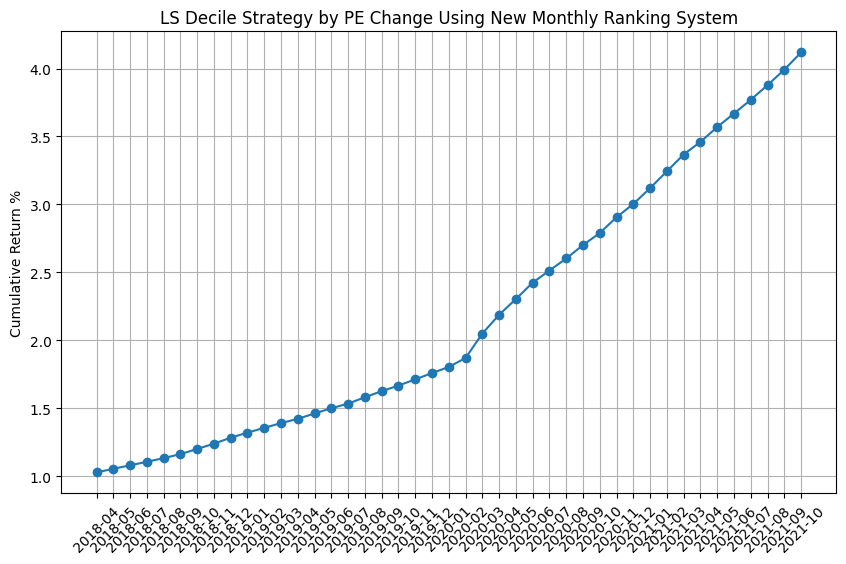

In [218]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(monthly_returns['month'].astype(str), monthly_returns['cum_long_short'], marker='o')
plt.xticks(rotation=45)
plt.ylabel('Cumulative Return %')
plt.title('LS Decile Strategy by PE Change Using New Monthly Ranking System')
plt.grid(True)
plt.show()


The new ranking had lower returns, but an incredible sharpe ratio. Indicative of good alpha.

PE: Sharpe=1.99, Max DD=-1.68%, Total P&L=$6133842.81
ROI: Sharpe=-3.16, Max DD=-100.00%, Total P&L=$-99999.43
Debt/MktCap: Sharpe=0.69, Max DD=-11.89%, Total P&L=$56138.27
PE + Debt/MktCap: Sharpe=1.93, Max DD=-0.41%, Total P&L=$2236928.90


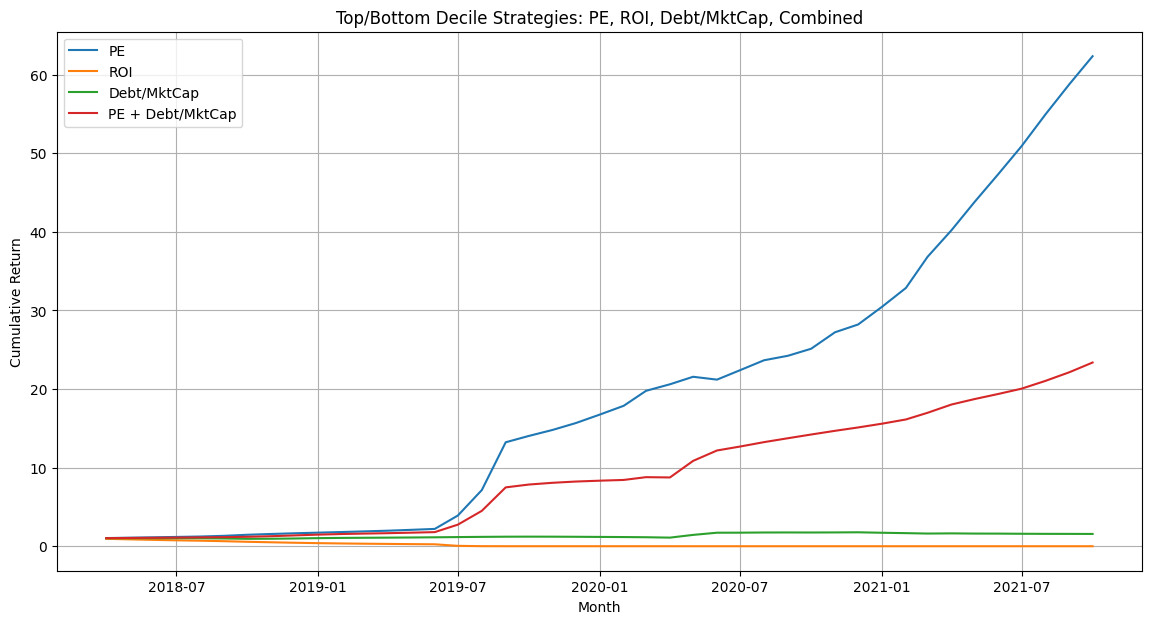

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pe = pd.read_csv("pe_selected_200.csv")
pe['date'] = pd.to_datetime(pe['date'])
pe['month'] = pe['date'].dt.to_period('M')

pe['debt_to_mktcap_ffill'] = pe.groupby('m_ticker_clean')['debt_to_mktcap'].ffill()

strategies = [
    ('pe', 'PE'),
    ('roi', 'ROI'),
    ('debt_to_mktcap_ffill', 'Debt/MktCap'),
    ('combined', 'PE + Debt/MktCap')
]

pe['pe_rank'] = pe.groupby('month')['pe'].transform(lambda x: pd.qcut(x, 4, labels=False, duplicates='drop'))
pe['roi_rank'] = pe.groupby('month')['roi'].transform(lambda x: pd.qcut(x, 4, labels=False, duplicates='drop'))
pe['debt_rank'] = pe.groupby('month')['debt_to_mktcap_ffill'].transform(lambda x: pd.qcut(x, 4, labels=False, duplicates='drop'))
pe['combined_rank'] = (pe['pe_rank'] + pe['debt_rank']) / 2

initial_capital = 100_000
stock_price = 100
results = {}

for metric, name in strategies:
    monthly_positions = []

    for month, df_month in pe.groupby('month'):
        df_month = df_month.copy()

        if metric == 'combined':
            df_month['quartile'] = pd.qcut(df_month['combined_rank'], 4, labels=False, duplicates='drop')
        else:
            df_month['quartile'] = pd.qcut(df_month[metric], 4, labels=False, duplicates='drop')

        bottom = df_month[df_month['quartile'] == 0].copy()
        top = df_month[df_month['quartile'] == 3].copy()

        n_bottom = len(bottom)
        n_top = len(top)

        if n_bottom > 0:
            position_size_bottom = initial_capital / 2 / n_bottom
            bottom['position_value'] = position_size_bottom
            bottom['shares'] = bottom['position_value'] / stock_price
            bottom['pnl'] = bottom['shares'] * bottom['roi']
        else:
            bottom['pnl'] = 0

        if n_top > 0:
            position_size_top = initial_capital / 2 / n_top
            top['position_value'] = position_size_top
            top['shares'] = top['position_value'] / stock_price
            top['pnl'] = top['shares'] * top['roi']
        else:
            top['pnl'] = 0

        long_short_pnl = bottom['pnl'].sum() - top['pnl'].sum()

        monthly_positions.append({
            'month': month.to_timestamp(),
            'bottom_ret': bottom['pnl'].sum() / (initial_capital/2) if n_bottom>0 else 0,
            'top_ret': top['pnl'].sum() / (initial_capital/2) if n_top>0 else 0,
            'long_short_ret': long_short_pnl / initial_capital
        })

    df_perf = pd.DataFrame(monthly_positions).sort_values('month')
    df_perf['cum_long_short'] = (1 + df_perf['long_short_ret']).cumprod()

    returns = df_perf['long_short_ret']
    sharpe = returns.mean() / returns.std() * np.sqrt(12)
    cum = df_perf['cum_long_short']
    max_dd = (cum / cum.cummax() - 1).min() * 100
    total_pl = (cum.iloc[-1] - 1) * initial_capital

    results[name] = {
        'df': df_perf,
        'Sharpe': sharpe,
        'Max DD (%)': max_dd,
        'Total P&L': total_pl
    }

for strat, metrics in results.items():
    print(f"{strat}: Sharpe={metrics['Sharpe']:.2f}, Max DD={metrics['Max DD (%)']:.2f}%, Total P&L=${metrics['Total P&L']:.2f}")

plt.figure(figsize=(14,7))
for strat, metrics in results.items():
    plt.plot(metrics['df']['month'], metrics['df']['cum_long_short'], label=strat)
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.title('Top/Bottom Decile Strategies: PE, ROI, Debt/MktCap, Combined')
plt.legend()
plt.grid(True)
plt.show()


The PE strat was by far the best LS portfolio. When the change was made to monthly rankings, the % return fell but the sharpe rose dramitcally because of such a small variance. Combining the PE and Debt to Market Cap was not a better strat than PE LS alone. The ROI LS was a horrible strat with bad sharpe and a blowout while the debt/market cap was middling at best (basically unusable). The sharpe ratio on the PE strat shows great promise and the max drawdown is a great figure. Very stable gains and likely good alpha. We need to look more into the PE revised monthly LS strat because the sharpe ratio was absurdly good.

Great assignment!